##  WeatherPy Analysis

### Temperatures High Close to Equator

* City temperatures tend to be higher closer to the equator because the Earth's equator is generally closer to the sun and receives more hours of sunlight.  This can be seen on the plot "City Latitude vs. Max Temperature" below.

### Temperatures Skewed North in July

* Temperatures are skewed higher north of the equator in July.  This is due to the Earth's tilt relative to the sun, causing the month of July to be hotter in the northern hemisphere, and cooler in the southern hemisphere.  The inverse would be true if we plotted temperatures by latitude in the month of January. This effect can be seen in the graph copied below on the right from the WeatherPy_Example.pdf that came with this assignment, where the temperatures are skewed higher in the southern hemisphere and cooler in the north because they were plotted for the month of January.

<img style="float: left;" src="City Latitude vs. Temperature.png" width="53%"/>
<img style="float: right;" src="Winter Temps.PNG" width="45%" />



#   

### More Cities in Northern Hemisphere

* Throughout all of the scatter plots, including the three shown below, a disproportionate share of the cities appear to fall in the northern hemisphere.  The original latitude points were generated randomly, and 50% fell in the southern hemisphere (i.e. lat < 0), but when the cities were returned from citypy, only 28% of cities found were in the southern hemisphere.

* This is probably because Earth's northern hemisphere contains a disproportionate share (67%) of the Earth's land (from Wikipedia: "Life on Earth: A - G.. 1. ABC-CLIO. 2002. p. 528. ISBN 9781576072868. Retrieved 8 September 2016").

* The northern hemisphere also contains 90% of the Earth's population, so it makes sense that a disproportionate share of the Earth's cities would fall in the northern hemisphere ("90% Of People Live In The Northern Hemisphere - Business Insider". Business Insider. 4 May 2012. Retrieved 10 November 2015.).

<img style="float: right;" src="City Latitude vs. Cloudiness.png" width="50%"/>

<img style="float: left;" src="City Latitude vs. Humidity.png" width="50%">

<img style="float: left;" src="City Latitude vs. Wind Speed.png" width="50%">


In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import requests
import datetime
import time
import json

# Import API key
import api_keys
api_key = api_keys.api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [171]:
southern_lats = sum(i < 0 for i in lats)
northern_lats = sum(i > 0 for i in lats)

print(f"There are {southern_lats} random points in south and {northern_lats} random points in north.")

There are 753 random points in south and 747 random points in north.


In [8]:
# Create pd DataFrame to hold city and weather data
cities_df = pd.DataFrame(data = {"City": cities})

# Add columns for lat, lng, temperature, humidity, cloudiness, wind speed
cities_df["Country"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Date"] = ""
cities_df["Min Temp"] = ""
cities_df["Temperature"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df.head()

,City,Country,Lat,Lng,Date,Min Temp,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed
0,tuktoyaktuk,,,,,,,,,,
1,geraldton,,,,,,,,,,
2,port elizabeth,,,,,,,,,,
3,natal,,,,,,,,,,
4,wairoa,,,,,,,,,,


## Perform API Calls

In [9]:
# create a params dict that will be updated with new city each iteration
params = {"key": api_key}

missing_cities = 0
record = 1

print("Beginning Data Retrieval")
print("--------------------------")

# Loop through the cities_df and run a search for each city
for index, row in cities_df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
        
    city = row['City']
   
    # make request
    response = requests.get(base_url, params=params)
    
    # convert to json
    response = response.json()

    try:       
        cities_df.loc[index, "Country"] = response['sys']['country']
        cities_df.loc[index, "Lat"] = response['coord']['lat']
        cities_df.loc[index, "Lng"] = response['coord']['lon']
        cities_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(int(response['dt'])).strftime('%Y-%m-%d %H:%M:%S')
        cities_df.loc[index, "Min Temp"] = response['main']['temp_min']
        cities_df.loc[index, "Temperature"] = response['main']['temp']
        cities_df.loc[index, "Max Temp"] = response['main']['temp_max']
        cities_df.loc[index, "Cloudiness"] = response['clouds']['all']
        cities_df.loc[index, "Humidity"] = response['main']['humidity']
        cities_df.loc[index, "Wind Speed"] = response['wind']['speed']

        print(f"Processing Record {record} of {len(cities_df)} | {city}")
        print(base_url)
        
        record = record +1
        
    except (KeyError, IndexError):
        missing_cities = missing_cities +1

print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")        
        
print(f"{len(cities_df)-missing_cities} cities found.")
print(f"{missing_cities} cities not found.")

Beginning Data Retrieval
--------------------------
Processing Record 1 of 599 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=tasiilaq
Processing Record 2 of 599 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=tuktoyaktuk
Processing Record 3 of 599 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=geraldton
Processing Record 4 of 599 | natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=port elizabeth
Processing Record 5 of 599 | wairoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=natal
Processing Record 6 of 599 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=wairoa
Processing Record 7 of 599 | ambulu
h

Processing Record 55 of 599 | novoagansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=mayumba
Processing Record 56 of 599 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=novoagansk
Processing Record 57 of 599 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=kaitangata
Processing Record 58 of 599 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=kavieng
Processing Record 59 of 599 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=ushuaia
Processing Record 60 of 599 | usinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=mahebourg
Processing Record 61 of 599 | ronneby
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 110 of 599 | whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=las vegas
Processing Record 111 of 599 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=whitehorse
Processing Record 112 of 599 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=puerto ayora
Processing Record 113 of 599 | roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=portland
Processing Record 114 of 599 | chunskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=roebourne
Processing Record 115 of 599 | arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=chunskiy
Processing Record 116 of 599 | panjakent
http://api.openweathermap.org/data/

Processing Record 165 of 599 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=norman wells
Processing Record 166 of 599 | bangkalan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=aklavik
Processing Record 167 of 599 | amga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=bangkalan
Processing Record 168 of 599 | sarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=amga
Processing Record 169 of 599 | novo horizonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=sarh
Processing Record 170 of 599 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=novo horizonte
Processing Record 171 of 599 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?

Processing Record 219 of 599 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=san quintin
Processing Record 220 of 599 | tezpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=port blair
Processing Record 221 of 599 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=tezpur
Processing Record 222 of 599 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=hilo
Processing Record 223 of 599 | sao sepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=severo-kurilsk
Processing Record 224 of 599 | yzeure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=sao sepe
Processing Record 225 of 599 | bone
http://api.openweathermap.org/data/2.5/weather?

Processing Record 274 of 599 | ballangen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=zemio
Processing Record 275 of 599 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=ballangen
Processing Record 276 of 599 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=port lincoln
Processing Record 277 of 599 | marrakesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=aswan
Processing Record 278 of 599 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=marrakesh
Processing Record 279 of 599 | lubbock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=zhicheng
Processing Record 280 of 599 | watsa
http://api.openweathermap.org/data/2.5/weather

Processing Record 328 of 599 | montepuez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=rush
Processing Record 329 of 599 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=montepuez
Processing Record 330 of 599 | wanlaweyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=lasa
Processing Record 331 of 599 | govardhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=wanlaweyn
Processing Record 332 of 599 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=govardhan
Processing Record 333 of 599 | isiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=lata
Processing Record 334 of 599 | sorvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 382 of 599 | biloela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=shediac
Processing Record 383 of 599 | tucson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=biloela
Processing Record 384 of 599 | paraiso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=tucson
Processing Record 385 of 599 | douglas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=paraiso
Processing Record 386 of 599 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=douglas
Processing Record 387 of 599 | tavda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=meulaboh
Processing Record 388 of 599 | karauzyak
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 437 of 599 | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=bourail
Processing Record 438 of 599 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=batemans bay
Processing Record 439 of 599 | bratsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=san patricio
Processing Record 440 of 599 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=bratsk
Processing Record 441 of 599 | vikulovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=onguday
Processing Record 442 of 599 | monrovia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=vikulovo
Processing Record 443 of 599 | amderma
http://api.openweathermap.org/data/2.5

Processing Record 491 of 599 | menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=broken hill
Processing Record 492 of 599 | santa catarina de tepehuanes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=menongue
Processing Record 493 of 599 | malatya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=santa catarina de tepehuanes
Processing Record 494 of 599 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=rawson
Processing Record 495 of 599 | pimenteiras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=derzhavinsk
Processing Record 496 of 599 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a9aac4e22f9e3f08579c341a7181aaa&q=pimenteiras
Processing Record 497 of 599 | com

,City,Country,Lat,Lng,Date,Min Temp,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed
0,tuktoyaktuk,GL,65.61,-37.64,2018-07-22 14:50:00,48.2,48.2,48.2,76,0,8.05
1,geraldton,CA,69.44,-133.03,2018-07-22 15:00:00,64.4,64.4,64.4,72,40,9.17
2,port elizabeth,CA,49.72,-86.95,2018-07-22 15:00:00,77,77,77,44,20,9.17
3,natal,US,39.31,-74.98,2018-07-22 15:14:00,80.6,81.68,82.4,78,90,10.29
4,wairoa,BR,-5.81,-35.21,2018-07-22 15:00:00,77,77,77,69,0,16.11


In [16]:
# remove missing cities
cities_df['Lat'].replace('', np.nan, inplace=True)
cities_df['Lng'].replace('', np.nan, inplace=True)
cities_df['Humidity'].replace('', np.nan, inplace=True)
cities_df['Temperature'].replace('', np.nan, inplace=True)
cities_df['Cloudiness'].replace('', np.nan, inplace=True)
cities_df['Wind Speed'].replace('', np.nan, inplace=True)
cities_weather_df = cities_df.dropna(how='any')
cities_weather_df.count()

City           540
Country        540
Lat            540
Lng            540
Date           540
Min Temp       540
Temperature    540
Max Temp       540
Humidity       540
Cloudiness     540
Wind Speed     540
dtype: int64

In [187]:
cities_df.head()

southern_lats = sum(i < 0 for i in lats)
south_share_lats = (southern_lats / len(lats))
southern_cities = sum(i < 0 for i in list(cities_df['Lat']))
south_share_cities = (southern_cities / len(cities_df))
print(f"While {int(south_share_lats*100)}% of the random points generated for latitude fell into the southern hemisphere,")
print(f"only {int(south_share_cities*100)}% of all cities were found in the southern hemisphere.")

While 50% of the random points generated for latitude fell into the southern hemisphere,
only 28% of all cities were found in the southern hemisphere.


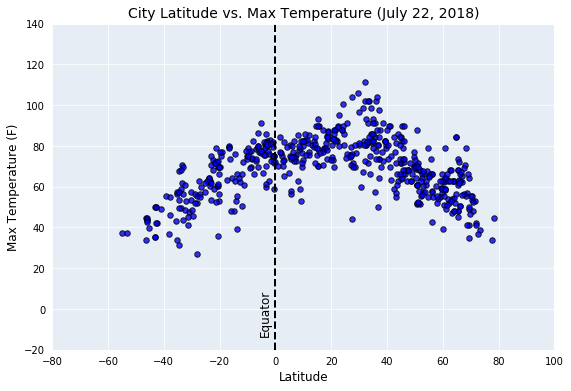

In [263]:
# Scatter plot to show relationship between city latitude and temperature

ts = cities_weather_df['Date'][0]
dt = datetime.datetime.strptime(ts,'%Y-%m-%d %H:%M:%S')
date = dt.date().strftime("%B %d, %Y")

ax = cities_weather_df.plot.scatter(['Lat'],['Max Temp'], c='b', edgecolor='k', alpha=0.8,
                                    s=30, figsize=(9,6))
plt.xlim([-80,100])
plt.ylim([-20,140])
plt.setp(ax.spines.values(), color='white')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
ax.set_title(f"City Latitude vs. Max Temperature ({date})", fontsize=14)
ax.set_xlabel("Latitude", fontsize=12)
ax.set_ylabel("Max Temperature (F)", fontsize=12)
ax.patch.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.3)
ax.grid(c='white')
ax.set_axisbelow('True')

plt.plot([0, 0], [-20, 140], 'k-', lw=2, linestyle='--')
plt.text(-6, 5, 'Equator', rotation=90, fontsize=12)

# Save the Figure
plt.savefig("City Latitude vs. Temperature.png")

# Show the Figure
plt.show()

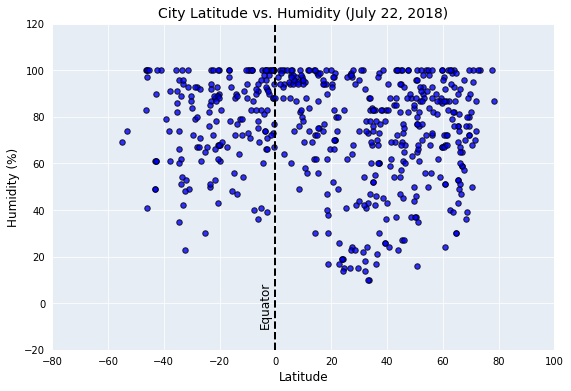

In [265]:
# Scatter plot to show relationship between city latitude and humidity

ax = cities_weather_df.plot.scatter(['Lat'],['Humidity'], c='b', edgecolor='k', alpha=0.8,
                                    s=30, figsize=(9,6))

plt.xlim([-80,100])
plt.ylim([-20,120])
plt.setp(ax.spines.values(), color='white')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
ax.set_title(f"City Latitude vs. Humidity ({date})", fontsize=14)
ax.set_xlabel("Latitude", fontsize=12)
ax.set_ylabel("Humidity (%)", fontsize=12)
ax.patch.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.3)
ax.grid(c='white')
ax.set_axisbelow('True')

plt.plot([0, 0], [-20, 120], 'k-', lw=2, linestyle='--')
plt.text(-6, 5, 'Equator', rotation=90, fontsize=12)

# Save the Figure
plt.savefig("City Latitude vs. Humidity.png")

# Show the Figure
plt.show()

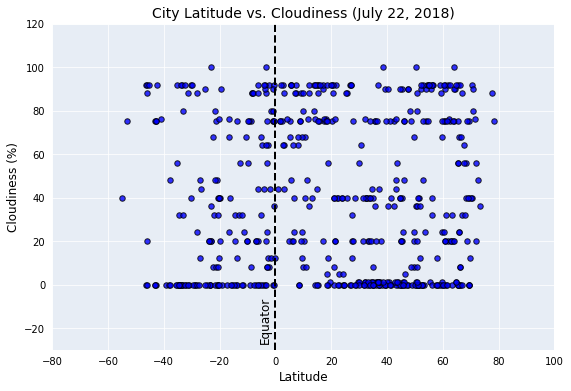

In [266]:
# Scatter plot to show relationship between city latitude and cloudiness

ax = cities_weather_df.plot.scatter(['Lat'],['Cloudiness'], c='b', edgecolor='k', alpha=0.8,
                                    s=30, figsize=(9,6))

plt.xlim([-80,100])
plt.ylim([-30,120])
plt.setp(ax.spines.values(), color='white')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
ax.set_title(f"City Latitude vs. Cloudiness ({date})", fontsize=14)
ax.set_xlabel("Latitude", fontsize=12)
ax.set_ylabel("Cloudiness (%)", fontsize=12)
ax.patch.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.3)
ax.grid(c='white')
ax.set_axisbelow('True')

plt.plot([0, 0], [-30, 120], 'k-', lw=2, linestyle='--')
plt.text(-6, -10, 'Equator', rotation=90, fontsize=12)

# Save the Figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show the Figure
plt.show()

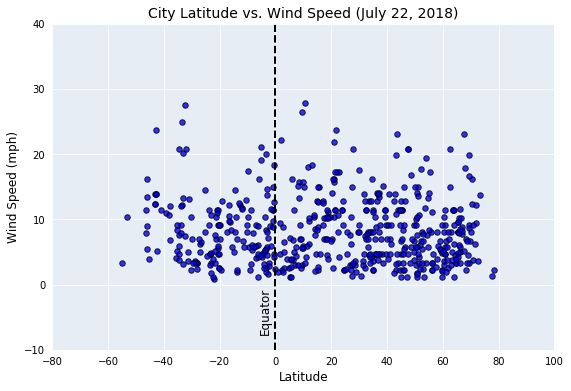

In [267]:
# Scatter plot to show relationship between city latitude and wind speed

ax = cities_weather_df.plot.scatter(['Lat'],['Wind Speed'], c='b', edgecolor='k', alpha=0.8,
                                    s=30, figsize=(9,6))

plt.xlim([-80,100])
plt.ylim([-10,40])
plt.setp(ax.spines.values(), color='white')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
ax.set_title(f"City Latitude vs. Wind Speed ({date})", fontsize=14)
ax.set_xlabel("Latitude", fontsize=12)
ax.set_ylabel("Wind Speed (mph)", fontsize=12)
ax.patch.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.3)
ax.grid(c='white')
ax.set_axisbelow('True')

plt.plot([0, 0], [-10, 120], 'k-', lw=2, linestyle='--')
plt.text(-6, -2, 'Equator', rotation=90, fontsize=12)

# Save the Figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show the Figure
plt.show()